Описание: за основу взят алгоритм Layered-Tree-Draw. 
1. Алгоритм находит корень (начиная с произвольной вершины, поднимается к корню, реализовано с помощью инверсии графа). 
2. Организуем на графе поиск в глубину с поддержкой некоторого глобального счётчика координаты x_delta (y для каждой вершины - это её расстояние до корня, взятое со знаком минус), начиная из корня. Для листьев сразу инкрементируем x_delta, фиксируем его как x-координату текущей вершины, и выходим из вершины. Для вершины, имеющей чётное число потомков, инкрементируем x_delta в момент, когда прошли половину её потомков, фиксируем глобальный x_delta как x-координату текущей вершины, и продолжаем обход оставшейся половины потомков. Для вершины, имеющей нечётное число потомков, фиксируем её x-координату как x-координату центрального потомка (без изменения глобального счётчика).

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def get_root(G):
    Grev = G.reverse()
    for node in Grev.nodes:
        tmp_node = node
        break

    cur_succ = [j for j in Grev.successors(tmp_node)]
    
    while cur_succ:
        tmp_node = cur_succ[0]
        cur_succ = [j for j in Grev.successors(tmp_node)]

    return tmp_node

In [3]:
G = nx.read_graphml("example.graphml")

In [4]:
root = get_root(G)
adj_mtx = {
    node: [j for j in G.successors(node)]
    for node in G.nodes
}

In [5]:
def draw_graph(G):
    def plot_node(x_coord, y_coord, name):
        plt.scatter([x_coord], [y_coord])
        plt.text(
            x_coord+0.1,
            y_coord,
            name, 
            fontsize=13, 
            verticalalignment='center', 
            horizontalalignment='left'
        )
    
    x_delta = 0
    def dfs(cur, depth=0):
        nonlocal x_delta

        succs_number = len(adj_mtx[cur])
        if succs_number == 0:
            x_delta += 1
            plot_node(x_delta, -depth, cur)
            return x_delta, -depth

        children_coords = []
        for ind, neighbour in enumerate(adj_mtx[cur]):
            if ind == succs_number // 2:
                if succs_number % 2 == 0:
                    x_delta += 1
                    x_coord = x_delta
                    children_coords.append(dfs(neighbour, depth + 1))
                else:
                    children_coords.append(dfs(neighbour, depth + 1))
                    x_coord = children_coords[-1][0]
                continue
            children_coords.append(dfs(neighbour, depth + 1))

        y_coord = -depth

        plot_node(x_coord, y_coord, cur)
        for x_child_coor, y_child_coor in children_coords:
            plt.arrow(
                x_coord, 
                y_coord, 
                x_child_coor-x_coord, 
                y_child_coor-y_coord, 
                length_includes_head=True,
                head_length=0.3,
                head_width=0.1
            )

        return x_coord, y_coord
    
    root = get_root(G)
    dfs(root)

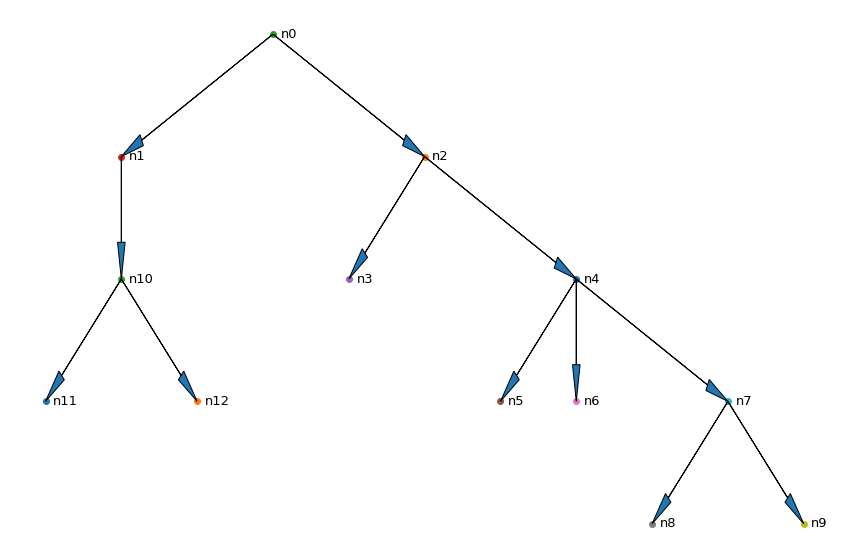

In [6]:
plt.figure(figsize=(15, 10))
draw_graph(G)
plt.axis('off')
plt.savefig("g.png")
plt.show()